<a href="https://colab.research.google.com/github/sunnywood0906/Programming-Language/blob/main/programming_language_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install jieba
!apt-get -y install fonts-noto-cjk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 1s (61.3 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [57]:
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv("擇偶條件女性20~30.csv", encoding="utf-8-sig")

In [63]:
import jieba


In [72]:
texts = df["擇偶條件文字"].dropna().tolist()

stop_words = set([
    "我", "的", "了", "是", "有", "會", "希望", "願意", "能", "要", "會", "可以",
    "對", "對方", "、", "。", "！", "?", "，", "想", "還", "也", "並", "讓", "應該", "去"
])
filtered_words = []

all_text = " ".join(texts)
words = jieba.lcut(all_text)
word_counts = Counter(words)
suspect_words = [(word, count) for word, count in word_counts.items() if len(word) == 2 and count >= 3]
for word, count in suspect_words:
    jieba.add_word(word)
for sentence in texts:
    words = list(jieba.cut(sentence))
    i = 0
    while i < len(words):
        if words[i] == "不" and i + 1 < len(words):
            # 嘗試組成 "不打遊戲" 或 "不抽菸"
            if i + 2 < len(words):
                combined = words[i] + words[i+1] + words[i+2]
                filtered_words.append(combined)
                i += 3
            else:
                combined = words[i] + words[i+1]
                filtered_words.append(combined)
                i += 2
        else:
            if words[i] not in stop_words and len(words[i]) > 1:
                filtered_words.append(words[i])
            i += 1


# 建立詞頻統計
word_counts = Counter(filtered_words)
print(word_counts.most_common(30))

[('有責', 31), ('任感', 31), ('喜歡', 22), ('整潔', 21), ('生活', 19), ('乾淨', 18), ('重視', 15), ('尊重', 15), ('朋友', 13), ('陪伴', 13), ('成長', 11), ('未來', 11), ('愛看', 10), ('一起', 10), ('不怕', 10), ('規劃', 10), ('不抽菸', 10), ('獨立', 10), ('目標', 10), ('家人', 9), ('不過度', 9), ('明確', 9), ('家庭', 9), ('傾聽', 9), ('寵物', 8), ('共同', 8), ('承諾', 8), ('進心', 8), ('兩人', 7), ('朋友圈', 7)]


In [49]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import os
print(os.path.exists(font_path))

True


In [51]:
import os

for root, dirs, files in os.walk("/usr/share/fonts"):
    for file in files:
        if file.endswith(".ttf") or file.endswith(".ttc"):
            print(os.path.join(root, file))

/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf
/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf
/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf
/usr/share/font

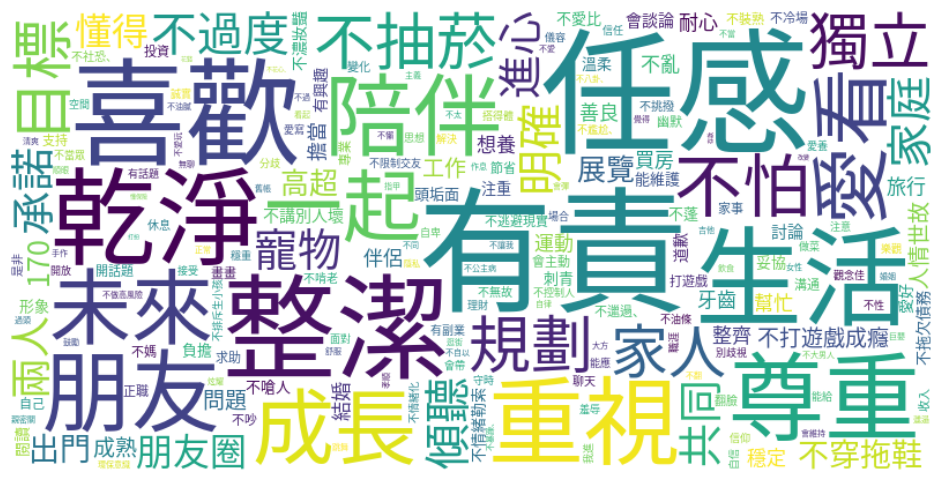

In [70]:
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
